# 概述

计算机视觉神器YOLOV8开源之后，成为了图像分类，人体姿态估计、关键点检测等领域的Baseline

本次主要系统讲解使用YOLOv8预训练模型完成人体姿态的推理预测

## 安装YOLOv8

In [ ]:
!pip install ultralytics --upgrade -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.5/617.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [ ]:
# 安装常用第三方库

!pip install numpy opencv-python pillow pandas matplotlib seaborn tqdm wandb seedir emoji -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 29.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=6c9fc5220d0a7ecd16a3614f217190c91f93be8179b6745f50efbb56767e52bc
  Stored in directory: /root/.cache/pip/wheels/00/16/9e/14169cbcb40ffbdc58d1ae6d1b559f333c4f9c44ed5ca22dfd
  Created wheel for p

## 关于YOLOv8

YOLOV8文档：https://docs.ultralytics.com

YOLOV8的Github主页：https://github.com/ultralytics/ultralytics

YOLOV8预训练模型库

https://github.com/ultralytics/ultralytics/tree/main/ultralytics/models/v8

YOLOV8命令行模板

```
yolo task=detect    mode=train    model=yolov8n.yaml                args...
      lassify      predict      yolov8n-cls.yaml             args...
      segment      val        yolov8n-seg.yaml             args...
               export       yolov8n.pt                format=onnx  
                                              args...
```                       

## 测试数据集

In [ ]:
# 下载图片

# 双人跑步，图片来源：https://www.pexels.com/zh-cn/photo/4853112
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220610-mmpose/images/two_runners.jpg -P images # 指定放在 images 文件夹中

# 马拉松多人跑步，图片来源：https://www.pexels.com/zh-cn/photo/2168292/
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220610-mmpose/images/multi-person.jpeg -P images # 指定放在 images 文件夹中

--2023-08-12 11:23:57--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220610-mmpose/images/two_runners.jpg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2387969 (2.3M) [image/jpeg]
Saving to: ‘images/two_runners.jpg’

two_runners.jpg     100%[===================>]   2.28M  4.64MB/s    in 0.5s    

2023-08-12 11:23:58 (4.64 MB/s) - ‘images/two_runners.jpg’ saved [2387969/2387969]

--2023-08-12 11:23:58--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220610-mmpose/images/multi-person.jpeg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmm

In [ ]:
# 下载视频

# 单人-唱跳篮球
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/videos/cxk.mp4 -P videos # 指定放在 videos 文件夹中

# 妈妈和女儿跳舞，视频来源：https://mixkit.co/free-stock-video/mother-and-daughters-in-a-kitchen-dancing-4565
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/videos/mother_wx.mp4 -P videos # 指定放在 videos 文件夹中

--2023-08-12 11:23:59--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/videos/cxk.mp4
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5535528 (5.3M) [video/mp4]
Saving to: ‘videos/cxk.mp4’

cxk.mp4             100%[===================>]   5.28M  9.05MB/s    in 0.6s    

2023-08-12 11:24:00 (9.05 MB/s) - ‘videos/cxk.mp4’ saved [5535528/5535528]

--2023-08-12 11:24:00--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/videos/mother_wx.mp4
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402

## 基于命令行实现YOLOv8模型预测（图片 + 视频）

In [ ]:
# 图片

!yolo pose predict model=yolov8x-pose-p6.pt source=images/multi-person.jpeg device=0

100% 190M/190M [00:01<00:00, 151MB/s]
Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose-p6 summary (fused): 375 layers, 99141280 parameters, 0 gradients

image 1/1 /content/images/multi-person.jpeg: 768x1280 15 persons, 142.9ms
Speed: 24.5ms preprocess, 142.9ms inference, 333.9ms postprocess per image at shape (1, 3, 768, 1280)
Results saved to runs/pose/predict


可选用的预训练模型：

yolov8n-pose.pt

yolov8s-pose.pt

yolov8m-pose.pt

yolov8l-pose.pt

yolov8x-pose.pt

yolov8x-pose-p6.pt

In [ ]:
# 视频1

!yolo pose predict model=yolov8x-pose-p6.pt source=videos/cxk.mp4 device=0

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose-p6 summary (fused): 375 layers, 99141280 parameters, 0 gradients

video 1/1 (1/1490) /content/videos/cxk.mp4: 768x1280 1 person, 125.9ms
video 1/1 (2/1490) /content/videos/cxk.mp4: 768x1280 1 person, 121.8ms
video 1/1 (3/1490) /content/videos/cxk.mp4: 768x1280 1 person, 122.6ms
video 1/1 (4/1490) /content/videos/cxk.mp4: 768x1280 1 person, 123.4ms
video 1/1 (5/1490) /content/videos/cxk.mp4: 768x1280 1 person, 123.4ms
video 1/1 (6/1490) /content/videos/cxk.mp4: 768x1280 1 person, 123.1ms
video 1/1 (7/1490) /content/videos/cxk.mp4: 768x1280 1 person, 122.8ms
video 1/1 (8/1490) /content/videos/cxk.mp4: 768x1280 1 person, 122.3ms
video 1/1 (9/1490) /content/videos/cxk.mp4: 768x1280 1 person, 123.2ms
video 1/1 (10/1490) /content/videos/cxk.mp4: 768x1280 1 person, 124.1ms
video 1/1 (11/1490) /content/videos/cxk.mp4: 768x1280 1 person, 124.3ms
video 1/1 (12/1490) /content/videos/cxk.mp4: 768x1

In [ ]:
# 视频2

!yolo pose predict model=yolov8x-pose-p6.pt source=videos/mother_wx.mp4 device=0

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose-p6 summary (fused): 375 layers, 99141280 parameters, 0 gradients

video 1/1 (1/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 268.5ms
video 1/1 (2/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 132.3ms
video 1/1 (3/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 132.3ms
video 1/1 (4/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 132.7ms
video 1/1 (5/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 132.1ms
video 1/1 (6/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 133.6ms
video 1/1 (7/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 132.5ms
video 1/1 (8/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 132.6ms
video 1/1 (9/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 131.9ms
video 1/1 (10/156) /content/videos/mother_wx.mp4: 768x1280 3 persons, 132.0ms
video 1/1 (11/156) /content/videos/mother_wx.mp4: 768x1280 3 p

## 基于 Python - API 实现YOLOv8模型预测（图片）

### 库

In [ ]:
from ultralytics import YOLO

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda:0


### 载入预训练模型

In [ ]:
# 选择YOLO模型，并载入对应的模型权重文件（自动下载）


# model = YOLO('yolov8n-pose.pt')
# model = YOLO('yolov8s-pose.pt')
# model = YOLO('yolov8m-pose.pt')
# model = YOLO('yolov8l-pose.pt')
# model = YOLO('yolov8x-pose.pt')
model = YOLO('yolov8x-pose-p6.pt')

100%|██████████| 190M/190M [00:10<00:00, 18.7MB/s]


### 查看模型信息

In [ ]:
model.device

device(type='cpu')

In [ ]:
model.names # 由于进行人体姿态估计，因此主要识别的对象是人

{0: 'person'}

### 进行预测

In [ ]:
# img_path = 'images/multi-person.jpeg'


img_path = 'images/two_runners.jpg'

In [ ]:
results = model(img_path)


image 1/1 /content/images/two_runners.jpg: 896x1280 2 persons, 157.2ms
Speed: 8.9ms preprocess, 157.2ms inference, 2.1ms postprocess per image at shape (1, 3, 896, 1280)


### 框的可视化预处理

In [ ]:
# 查看预测结果

results[0] # 总共包含boxes 与 keypoints 两大信息，接下来需要对这些信息进行分析

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'person'}
orig_img: array([[[ 30,  32,  42],
        [ 28,  30,  40],
        [ 28,  30,  40],
        ...,
        [220, 218, 208],
        [222, 220, 210],
        [225, 223, 213]],

       [[ 28,  30,  40],
        [ 27,  29,  39],
        [ 28,  30,  40],
        ...,
        [220, 218, 208],
        [222, 220, 210],
        [224, 222, 212]],

       [[ 27,  29,  39],
        [ 27,  29,  39],
        [ 29,  31,  41],
        ...,
        [220, 218, 208],
        [222, 220, 210],
        [224, 222, 212]],

       ...,

       [[201, 201, 195],
        [199, 199, 193],
        [201, 201, 195],
        ...,
        [200, 195, 186],
        [198, 193, 184],
        [197, 192, 183]],

       [[206, 206, 200],
        [205, 205, 199],
        [206, 206, 200],
        ...,
     

In [ ]:
# 对每个框进行排序
num_bbox = len(results[0].boxes.cls)

print('预测出 {} 个框'.format(num_bbox))

预测出 2 个框


In [ ]:
# 预测类别 ID

results[0].boxes.cls

tensor([0., 0.], device='cuda:0')

In [ ]:
# 每个框的置信度

results[0].boxes.conf

tensor([0.9470, 0.9453], device='cuda:0')

In [ ]:
# 每个框的：左上角XY坐标、右下角XY坐标

results[0].boxes.xyxy

tensor([[2820., 1052., 3545., 3391.],
        [1647.,  773., 2532., 3392.]], device='cuda:0')

In [ ]:
# 转成uint32类型的 numpy array
bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

bboxes_xyxy

array([[2820, 1052, 3545, 3391],
       [1647,  773, 2532, 3392]], dtype=uint32)

### 关键点的可视化预处理

In [ ]:
# 每个框，每个关键点的 XY坐标 置信度

results[0].keypoints.shape

torch.Size([2, 17, 3])

In [ ]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9988, 0.9937, 0.9955, 0.8148, 0.9217, 0.9993, 0.9991, 0.9911, 0.9878, 0.9878, 0.9885, 0.9995, 0.9994, 0.9988, 0.9985, 0.9838, 0.9781],
        [0.9994, 0.9985, 0.9947, 0.9660, 0.7834, 0.9997, 0.9996, 0.9959, 0.9935, 0.9948, 0.9928, 0.9998, 0.9997, 0.9991, 0.9986, 0.9782, 0.9698]], device='cuda:0')
data: tensor([[[3.1768e+03, 1.2538e+03, 9.9880e-01],
         [3.2240e+03, 1.2167e+03, 9.9368e-01],
         [3.1313e+03, 1.2159e+03, 9.9553e-01],
         [3.2865e+03, 1.2672e+03, 8.1482e-01],
         [3.0594e+03, 1.2663e+03, 9.2170e-01],
         [3.3551e+03, 1.5237e+03, 9.9935e-01],
         [2.9605e+03, 1.5625e+03, 9.9914e-01],
         [3.4501e+03, 1.7591e+03, 9.9106e-01],
         [2.8758e+03, 1.8908e+03, 9.8777e-01],
         [3.4896e+03, 2.0220e+03, 9.8781e-01],
         [3.0384e+03, 1.8328e+03, 9.8849e-01],
         [3.2983e+03, 2.1781e+03, 9.9952e-01],
         [3.0387e+03, 2.2130e+03, 9.9943e-01],
     

In [ ]:
# 转为uint32类型数据进行可视化配置，原因是因为关键点的位置信息不存在浮点数，理应用整型数据进行表示，否则无法确定关键点

bboxes_keypoints = results[0].keypoints.data.cpu().numpy().astype('uint32')

In [ ]:
type(bboxes_keypoints)

numpy.ndarray

In [ ]:
# 转为 numpy array
bboxes_keypoints

array([[[3176, 1253,    0],
        [3224, 1216,    0],
        [3131, 1215,    0],
        [3286, 1267,    0],
        [3059, 1266,    0],
        [3355, 1523,    0],
        [2960, 1562,    0],
        [3450, 1759,    0],
        [2875, 1890,    0],
        [3489, 2021,    0],
        [3038, 1832,    0],
        [3298, 2178,    0],
        [3038, 2213,    0],
        [3305, 2634,    0],
        [3058, 2726,    0],
        [3279, 2993,    0],
        [3122, 3174,    0]],

       [[2121, 1024,    0],
        [2175,  976,    0],
        [2075,  983,    0],
        [2265, 1021,    0],
        [2020, 1030,    0],
        [2386, 1381,    0],
        [1882, 1334,    0],
        [2468, 1767,    0],
        [1710, 1699,    0],
        [2400, 1981,    0],
        [1745, 2028,    0],
        [2251, 2122,    0],
        [1931, 2100,    0],
        [2229, 2658,    0],
        [1972, 2662,    0],
        [2112, 3158,    0],
        [1942, 2945,    0]]], dtype=uint32)

### 利用OpenCV进行可视化

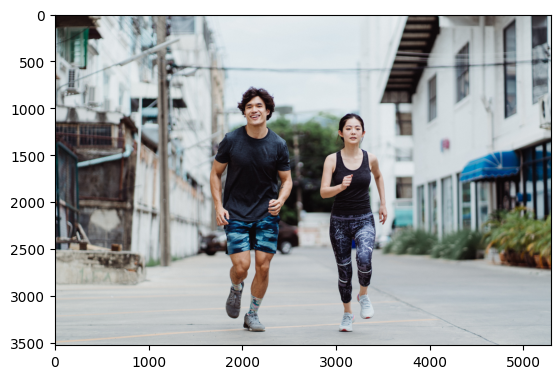

In [ ]:
img_bgr = cv2.imread(img_path)

plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [ ]:
# 框的可视化配置
bbox_color = (150, 0, 0)             # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框的类别文字
bbox_labelstr = {
    'font_size':6,         # 字体大小
    'font_thickness':14,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

In [ ]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'Nose', 'color':[0, 0, 255], 'radius':25},                # 鼻尖
    1:{'name':'Right Eye', 'color':[255, 0, 0], 'radius':25},           # 右边眼睛
    2:{'name':'Left Eye', 'color':[255, 0, 0], 'radius':25},            # 左边眼睛
    3:{'name':'Right Ear', 'color':[0, 255, 0], 'radius':25},           # 右边耳朵
    4:{'name':'Left Ear', 'color':[0, 255, 0], 'radius':25},            # 左边耳朵
    5:{'name':'Right Shoulder', 'color':[193, 182, 255], 'radius':25},  # 右边肩膀
    6:{'name':'Left Shoulder', 'color':[193, 182, 255], 'radius':25},   # 左边肩膀
    7:{'name':'Right Elbow', 'color':[16, 144, 247], 'radius':25},      # 右侧胳膊肘
    8:{'name':'Left Elbow', 'color':[16, 144, 247], 'radius':25},       # 左侧胳膊肘
    9:{'name':'Right Wrist', 'color':[1, 240, 255], 'radius':25},       # 右侧手腕
    10:{'name':'Left Wrist', 'color':[1, 240, 255], 'radius':25},       # 左侧手腕
    11:{'name':'Right Hip', 'color':[140, 47, 240], 'radius':25},       # 右侧胯
    12:{'name':'Left Hip', 'color':[140, 47, 240], 'radius':25},        # 左侧胯
    13:{'name':'Right Knee', 'color':[223, 155, 60], 'radius':25},      # 右侧膝盖
    14:{'name':'Left Knee', 'color':[223, 155, 60], 'radius':25},       # 左侧膝盖
    15:{'name':'Right Ankle', 'color':[139, 0, 0], 'radius':25},        # 右侧脚踝
    16:{'name':'Left Ankle', 'color':[139, 0, 0], 'radius':25},         # 左侧脚踝
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':10,       # 字体粗细
    'offset_x':0,             # X 方向，文字偏移距离，向右为正
    'offset_y':150,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':15, 'dst_kpt_id':13, 'color':[0, 100, 255], 'thickness':5},       # 右侧脚踝-右侧膝盖
    {'srt_kpt_id':13, 'dst_kpt_id':11, 'color':[0, 255, 0], 'thickness':5},         # 右侧膝盖-右侧胯
    {'srt_kpt_id':16, 'dst_kpt_id':14, 'color':[255, 0, 0], 'thickness':5},         # 左侧脚踝-左侧膝盖
    {'srt_kpt_id':14, 'dst_kpt_id':12, 'color':[0, 0, 255], 'thickness':5},         # 左侧膝盖-左侧胯
    {'srt_kpt_id':11, 'dst_kpt_id':12, 'color':[122, 160, 255], 'thickness':5},     # 右侧胯-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':11, 'color':[139, 0, 139], 'thickness':5},        # 右边肩膀-右侧胯
    {'srt_kpt_id':6, 'dst_kpt_id':12, 'color':[237, 149, 100], 'thickness':5},      # 左边肩膀-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':6, 'color':[152, 251, 152], 'thickness':5},       # 右边肩膀-左边肩膀
    {'srt_kpt_id':5, 'dst_kpt_id':7, 'color':[148, 0, 69], 'thickness':5},          # 右边肩膀-右侧胳膊肘
    {'srt_kpt_id':6, 'dst_kpt_id':8, 'color':[0, 75, 255], 'thickness':5},          # 左边肩膀-左侧胳膊肘
    {'srt_kpt_id':7, 'dst_kpt_id':9, 'color':[56, 230, 25], 'thickness':5},         # 右侧胳膊肘-右侧手腕
    {'srt_kpt_id':8, 'dst_kpt_id':10, 'color':[0,240, 240], 'thickness':5},         # 左侧胳膊肘-左侧手腕
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[224,255, 255], 'thickness':5},        # 右边眼睛-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[47,255, 173], 'thickness':5},         # 鼻尖-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[203,192,255], 'thickness':5},         # 鼻尖-左边眼睛
    {'srt_kpt_id':1, 'dst_kpt_id':3, 'color':[196, 75, 255], 'thickness':5},        # 右边眼睛-右边耳朵
    {'srt_kpt_id':2, 'dst_kpt_id':4, 'color':[86, 0, 25], 'thickness':5},           # 左边眼睛-左边耳朵
    {'srt_kpt_id':3, 'dst_kpt_id':5, 'color':[255,255, 0], 'thickness':5},          # 右边耳朵-右边肩膀
    {'srt_kpt_id':4, 'dst_kpt_id':6, 'color':[255, 18, 200], 'thickness':5}         # 左边耳朵-左边肩膀
]

In [ ]:
for idx in range(num_bbox): # 遍历每个框

    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx]

    # 获取框的预测类别（对于关键点检测，只有一个类别）
    bbox_label = results[0].names[0]

    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)

    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

    # 索引出每一个框下的关键点信息
    bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度，但实际上只使用了关键点坐标

    # 先画骨架，再画关键点，以防关键点被骨架的标注线覆盖，从而影响最终的可视化效果

    # 画该框的骨架连接
    for skeleton in skeleton_map:

        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id'] # 利用skeleton_map中srt_kpt_id索引每一个框下的所有关键点位置坐标
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]

        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id'] # 利用skeleton_map中dst_kpt_id索引每一个框下的所有关键点位置坐标
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]

        # 获取骨架连接颜色
        skeleton_color = skeleton['color']

        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']

        # 画骨架连接线，将srt_kpt_id与dst_kpt_id索引的关键点按照skeleton_map的关系链接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)

    # 画该框的关键点
    for kpt_id in kpt_color_map:

        # 获取该关键点的颜色、半径、XY坐标
        kpt_color = kpt_color_map[kpt_id]['color']
        kpt_radius = kpt_color_map[kpt_id]['radius']
        kpt_x = bbox_keypoints[kpt_id][0]
        kpt_y = bbox_keypoints[kpt_id][1]

        # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

        # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        kpt_label = str(kpt_id) # 写关键点类别 ID（二选一）
        # kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称（二选一）
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

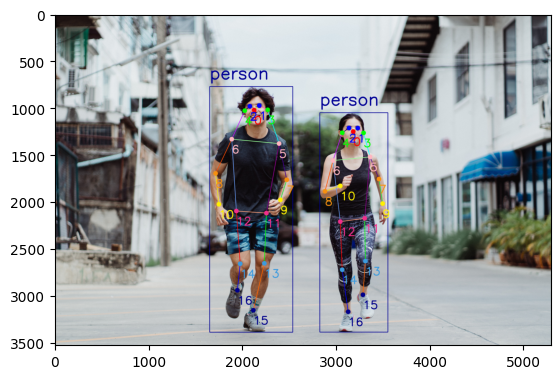

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [ ]:
cv2.imwrite('C1_output.jpg', img_bgr)

True

## 基于 Python - API 实现YOLOv8模型预测（视频）

### 库

In [ ]:
import cv2
import numpy as np
import time
from tqdm import tqdm

from ultralytics import YOLO

import matplotlib.pyplot as plt
%matplotlib inline

import torch
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda:0


### 载入预训练模型

In [ ]:
# model = YOLO('yolov8n-pose.pt')
# model = YOLO('yolov8s-pose.pt')
# model = YOLO('yolov8m-pose.pt')
# model = YOLO('yolov8l-pose.pt')
# model = YOLO('yolov8x-pose.pt')
model = YOLO('yolov8x-pose-p6.pt')

### 可视化配置

In [ ]:
# 框（rectangle）可视化配置
bbox_color = (150, 0, 0)             # 框的 BGR 颜色
bbox_thickness = 2                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':1,         # 字体大小
    'font_thickness':2,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-10,       # Y 方向，文字偏移距离，向下为正
}

In [ ]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'Nose', 'color':[0, 0, 255], 'radius':6},                # 鼻尖
    1:{'name':'Right Eye', 'color':[255, 0, 0], 'radius':6},           # 右边眼睛
    2:{'name':'Left Eye', 'color':[255, 0, 0], 'radius':6},            # 左边眼睛
    3:{'name':'Right Ear', 'color':[0, 255, 0], 'radius':6},           # 右边耳朵
    4:{'name':'Left Ear', 'color':[0, 255, 0], 'radius':6},            # 左边耳朵
    5:{'name':'Right Shoulder', 'color':[193, 182, 255], 'radius':6},  # 右边肩膀
    6:{'name':'Left Shoulder', 'color':[193, 182, 255], 'radius':6},   # 左边肩膀
    7:{'name':'Right Elbow', 'color':[16, 144, 247], 'radius':6},      # 右侧胳膊肘
    8:{'name':'Left Elbow', 'color':[16, 144, 247], 'radius':6},       # 左侧胳膊肘
    9:{'name':'Right Wrist', 'color':[1, 240, 255], 'radius':6},       # 右侧手腕
    10:{'name':'Left Wrist', 'color':[1, 240, 255], 'radius':6},       # 左侧手腕
    11:{'name':'Right Hip', 'color':[140, 47, 240], 'radius':6},       # 右侧胯
    12:{'name':'Left Hip', 'color':[140, 47, 240], 'radius':6},        # 左侧胯
    13:{'name':'Right Knee', 'color':[223, 155, 60], 'radius':6},      # 右侧膝盖
    14:{'name':'Left Knee', 'color':[223, 155, 60], 'radius':6},       # 左侧膝盖
    15:{'name':'Right Ankle', 'color':[139, 0, 0], 'radius':6},        # 右侧脚踝
    16:{'name':'Left Ankle', 'color':[139, 0, 0], 'radius':6},         # 左侧脚踝
}

# 点类别文字
kpt_labelstr = {
    'font_size':0.5,             # 字体大小
    'font_thickness':1,       # 字体粗细
    'offset_x':10,             # X 方向，文字偏移距离，向右为正
    'offset_y':0,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':15, 'dst_kpt_id':13, 'color':[0, 100, 255], 'thickness':2},       # 右侧脚踝-右侧膝盖
    {'srt_kpt_id':13, 'dst_kpt_id':11, 'color':[0, 255, 0], 'thickness':2},         # 右侧膝盖-右侧胯
    {'srt_kpt_id':16, 'dst_kpt_id':14, 'color':[255, 0, 0], 'thickness':2},         # 左侧脚踝-左侧膝盖
    {'srt_kpt_id':14, 'dst_kpt_id':12, 'color':[0, 0, 255], 'thickness':2},         # 左侧膝盖-左侧胯
    {'srt_kpt_id':11, 'dst_kpt_id':12, 'color':[122, 160, 255], 'thickness':2},     # 右侧胯-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':11, 'color':[139, 0, 139], 'thickness':2},        # 右边肩膀-右侧胯
    {'srt_kpt_id':6, 'dst_kpt_id':12, 'color':[237, 149, 100], 'thickness':2},      # 左边肩膀-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':6, 'color':[152, 251, 152], 'thickness':2},       # 右边肩膀-左边肩膀
    {'srt_kpt_id':5, 'dst_kpt_id':7, 'color':[148, 0, 69], 'thickness':2},          # 右边肩膀-右侧胳膊肘
    {'srt_kpt_id':6, 'dst_kpt_id':8, 'color':[0, 75, 255], 'thickness':2},          # 左边肩膀-左侧胳膊肘
    {'srt_kpt_id':7, 'dst_kpt_id':9, 'color':[56, 230, 25], 'thickness':2},         # 右侧胳膊肘-右侧手腕
    {'srt_kpt_id':8, 'dst_kpt_id':10, 'color':[0,240, 240], 'thickness':2},         # 左侧胳膊肘-左侧手腕
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[224,255, 255], 'thickness':2},        # 右边眼睛-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[47,255, 173], 'thickness':2},         # 鼻尖-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[203,192,255], 'thickness':2},         # 鼻尖-左边眼睛
    {'srt_kpt_id':1, 'dst_kpt_id':3, 'color':[196, 75, 255], 'thickness':2},        # 右边眼睛-右边耳朵
    {'srt_kpt_id':2, 'dst_kpt_id':4, 'color':[86, 0, 25], 'thickness':2},           # 左边眼睛-左边耳朵
    {'srt_kpt_id':3, 'dst_kpt_id':5, 'color':[255,255, 0], 'thickness':2},          # 右边耳朵-右边肩膀
    {'srt_kpt_id':4, 'dst_kpt_id':6, 'color':[255, 18, 200], 'thickness':2}         # 左边耳朵-左边肩膀
]

### 视频逐帧处理

In [ ]:
def process_frame(img_bgr):

    '''
    输入摄像头画面 bgr-array，输出图像 bgr-array
    '''

    results = model(img_bgr, verbose=False) # verbose设置为False，不单独打印每一帧预测结果

    # 预测框的个数
    num_bbox = len(results[0].boxes.cls)

    # 预测框的 xyxy 坐标
    bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

    # 关键点的 xy 坐标
    bboxes_keypoints = results[0].keypoints.data.cpu().numpy().astype('uint32')

    for idx in range(num_bbox): # 遍历每个框

        # 获取该框坐标
        bbox_xyxy = bboxes_xyxy[idx]

        # 获取框的预测类别（对于关键点检测，只有一个类别）
        bbox_label = results[0].names[0]

        # 画框
        img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)

        # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

        bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度

        # 画该框的骨架连接
        for skeleton in skeleton_map:

            # 获取起始点坐标
            srt_kpt_id = skeleton['srt_kpt_id']
            srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
            srt_kpt_y = bbox_keypoints[srt_kpt_id][1]

            # 获取终止点坐标
            dst_kpt_id = skeleton['dst_kpt_id']
            dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
            dst_kpt_y = bbox_keypoints[dst_kpt_id][1]

            # 获取骨架连接颜色
            skeleton_color = skeleton['color']

            # 获取骨架连接线宽
            skeleton_thickness = skeleton['thickness']

            # 画骨架连接
            img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)

        # 画该框的关键点
        for kpt_id in kpt_color_map:

            # 获取该关键点的颜色、半径、XY坐标
            kpt_color = kpt_color_map[kpt_id]['color']
            kpt_radius = kpt_color_map[kpt_id]['radius']
            kpt_x = bbox_keypoints[kpt_id][0]
            kpt_y = bbox_keypoints[kpt_id][1]

            # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
            img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

            # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
            kpt_label = str(kpt_id) # 写关键点类别 ID（二选一）
            # kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称（二选一）
            img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

    return img_bgr

In [ ]:
# 视频逐帧处理


def generate_video(input_path='videos/robot.mp4'):
    filehead = input_path.split('/')[-1]
    output_path = "out-" + filehead

    print('视频开始处理',input_path)

    # 获取视频总帧数
    cap = cv2.VideoCapture(input_path)
    frame_count = 0
    while(cap.isOpened()):
        success, frame = cap.read() # 每次成功读入一帧，记success = 1
        frame_count += 1
        if not success:
            break
    cap.release()
    print('视频总帧数为',frame_count) # 对输入视频首先记录总帧数


    #cap = cv2.VideoCapture(input_path)
    frame_size = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # 获取输入视频的尺寸


    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # 输出文件设置为 MP4 格式
    fps = cap.get(cv2.CAP_PROP_FPS) # 记录帧率

    out = cv2.VideoWriter(output_path, fourcc, fps, (int(frame_size[0]), int(frame_size[1])))

    # 使用进度条 表示 输入视频每一帧的 获取，处理与输出过程
    with tqdm(total=frame_count-1) as pbar:
        try:
            while(cap.isOpened()):
                success, frame = cap.read()
                if not success:
                    break

                # 处理帧
                # frame_path = './temp_frame.png'
                # cv2.imwrite(frame_path, frame)
                try:
                    frame = process_frame(frame) # 循环处理获取的每一帧
                except:
                    print('error')
                    pass

                if success == True:
                    # cv2.imshow('Video Processing', frame)
                    out.write(frame) # 将处理后的每一帧以MP4视频的格式进行输出

                    # 进度条更新一帧
                    pbar.update(1) # 切换下一帧

                # if cv2.waitKey(1) & 0xFF == ord('q'):
                    # break
        except:
            print('中途中断')
            pass

    cv2.destroyAllWindows()
    out.release() # 停止输出流
    cap.release() # 关闭摄像头
    print('视频已保存', output_path)

In [ ]:
generate_video(input_path='/content/cxk.mp4')

视频开始处理 /content/cxk.mp4
视频总帧数为 1491


100%|██████████| 1490/1490 [03:53<00:00,  6.37it/s]

视频已保存 out-cxk.mp4
